<a href="https://colab.research.google.com/github/dhruvworld/AiProj/blob/main/ai_neural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pandas as pd

base_path = '/content/drive/MyDrive/NIDS_Data'
main_categories = ['benign', 'brute_force', 'exploit', 'flood', 'malware', 'probe']

all_dataframes = []

for category in main_categories:
    category_path = os.path.join(base_path, category)
    temp_data = []

    for root, dirs, files in os.walk(category_path):  # supports nested malware folders
        for file in files:
            if file.endswith('.csv'):
                file_path = os.path.join(root, file)
                try:
                    df = pd.read_csv(file_path)
                    df['attack_type'] = category
                    temp_data.append(df)
                except Exception as e:
                    print(f"⚠️ Skipped {file}: {e}")

    if temp_data:
        merged = pd.concat(temp_data, ignore_index=True)
        print(f"✅ {category}: {len(temp_data)} files loaded, {merged.shape[0]} rows")
        all_dataframes.append(merged)

combined_df = pd.concat(all_dataframes, ignore_index=True)
print("📦 Final dataset shape:", combined_df.shape)
print("🧾 Label breakdown:\n", combined_df['attack_type'].value_counts())


✅ benign: 5 files loaded, 22084 rows
✅ brute_force: 5 files loaded, 19551 rows
✅ exploit: 4 files loaded, 61462 rows
✅ flood: 6 files loaded, 29336 rows
✅ malware: 13 files loaded, 7000 rows
✅ probe: 1 files loaded, 11629 rows
📦 Final dataset shape: (151062, 8)
🧾 Label breakdown:
 attack_type
exploit        61462
flood          29336
benign         22084
brute_force    19551
probe          11629
malware         7000
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

X = combined_df.drop(columns=['attack_type'], errors='ignore')
X = X.select_dtypes(include=['number'])
y = combined_df['attack_type']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42
)

print("✅ Features:", X_train.shape[1])
print("🧠 Labels:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))


✅ Features: 3
🧠 Labels: {'benign': np.int64(0), 'brute_force': np.int64(1), 'exploit': np.int64(2), 'flood': np.int64(3), 'malware': np.int64(4), 'probe': np.int64(5)}


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

input_dim = X_train.shape[1]
output_dim = len(label_encoder.classes_)

model = Sequential([
    Dense(128, activation='relu', input_shape=(input_dim,)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(output_dim, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(X_train, y_train, epochs=15, batch_size=54, validation_split=0.1, verbose=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 128)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,046 (43.15 KB)

 Trainable params: 11,046 (43.15 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
2015/2015 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6855 - loss: 0.7788 - val_accuracy: 0.8332 - val_loss: 0.4236
Epoch 2/15
2015/2015 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8200 - loss: 0.4388 - val_accuracy: 0.8715 - val_loss: 0.3255
Epoch 3/15
2015/2015 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8480 - loss: 0.3670 - val_accuracy: 0.8725 - val_loss: 0.2929
Epoch 4/15
2015/2015 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8616 - loss: 0.3322 - val_accuracy: 0.8857 - val_loss: 0.2732
Epoch 5/15
2015/2015 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8693 - loss: 0.3099 - val_accuracy: 0.8939 - val_loss: 0.2638
Epoch 6/15
2015/2015 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8745 - loss: 0.2965 - val_accuracy: 0.9013 - val_loss: 0.2379
Epoch 7/15
2015/2015 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8788 - loss: 0.2877 - val_accuracy: 0.9005 - val_loss: 0.2327
Epoch 8/15
2015/2015 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.8831 - loss: 0.2728 

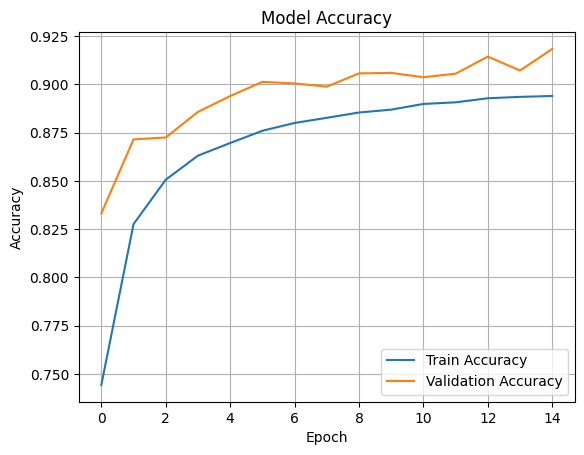

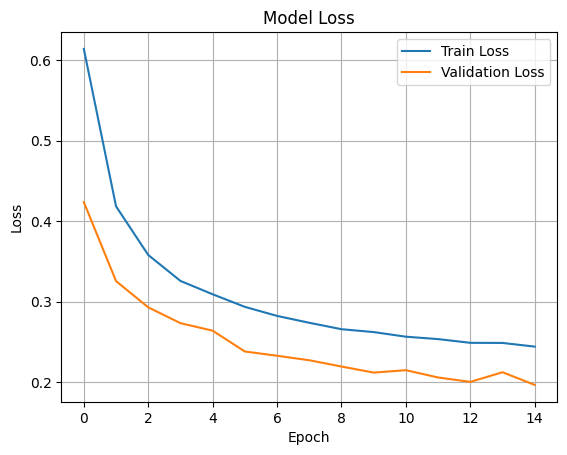

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import classification_report

loss, accuracy = model.evaluate(X_test, y_test)
print(f"🧪 Test Accuracy: {accuracy:.4f}")

y_pred_probs = model.predict(X_test)
y_pred = y_pred_probs.argmax(axis=1)

print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


945/945 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9133 - loss: 0.1964
🧪 Test Accuracy: 0.9144
945/945 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

      benign       1.00      1.00      1.00      4267
 brute_force       0.83      0.80      0.81      3966
     exploit       1.00      0.91      0.95     12347
       flood       0.81      0.96      0.88      5921
     malware       0.76      0.83      0.79      1371
       probe       0.91      0.93      0.92      2341

    accuracy                           0.91     30213
   macro avg       0.88      0.90      0.89     30213
weighted avg       0.92      0.91      0.92     30213



In [ ]:
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)

print("\n🧠 DETAILED INTERPRETATION OF DETECTION RESULTS:\n")

for label in label_encoder.classes_:
    metrics = report[label]
    precision = metrics["precision"]
    recall = metrics["recall"]
    f1 = metrics["f1-score"]
    support = metrics["support"]

    print(f"▶️ Class: {label.upper()} (Support: {support:.0f})")
    print(f"   Precision: {precision:.2f}")
    print(f"   Recall   : {recall:.2f}")
    print(f"   F1-score : {f1:.2f}")

    if recall >= 0.95 and precision >= 0.95:
        print("   ✅ Excellent detection. Very few false positives or false negatives.\n")
    elif recall >= 0.80:
        print("   ⚠️ Good detection, but missed a few samples (false negatives likely).\n")
    elif recall >= 0.50:
        print("   🚨 Weak detection — model is struggling to catch this attack type.\n")
    else:
        print("   ❌ Failed detection — likely due to class imbalance, poor features, or underfitting.\n")



🧠 DETAILED INTERPRETATION OF DETECTION RESULTS:

▶️ Class: BENIGN (Support: 4267)
   Precision: 1.00
   Recall   : 1.00
   F1-score : 1.00
   ✅ Excellent detection. Very few false positives or false negatives.

▶️ Class: BRUTE_FORCE (Support: 3966)
   Precision: 0.83
   Recall   : 0.80
   F1-score : 0.81
   🚨 Weak detection — model is struggling to catch this attack type.

▶️ Class: EXPLOIT (Support: 12347)
   Precision: 1.00
   Recall   : 0.91
   F1-score : 0.95
   ⚠️ Good detection, but missed a few samples (false negatives likely).

▶️ Class: FLOOD (Support: 5921)
   Precision: 0.81
   Recall   : 0.96
   F1-score : 0.88
   ⚠️ Good detection, but missed a few samples (false negatives likely).

▶️ Class: MALWARE (Support: 1371)
   Precision: 0.76
   Recall   : 0.83
   F1-score : 0.79
   ⚠️ Good detection, but missed a few samples (false negatives likely).

▶️ Class: PROBE (Support: 2341)
   Precision: 0.91
   Recall   : 0.93
   F1-score : 0.92
   ⚠️ Good detection, but missed a few s